In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myfft import myfft

In [2]:
exec(open('ComputeDelays.py').read())
GS100=timedata('GS100')
readlabdat('may16_1.csv',GS100)

GS1000=timedata('GS1000')
readlabdat('may16_5.csv',GS1000)

C:\Users\katie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.00642104e+02 6.28000000e+05 1.00951265e+05]


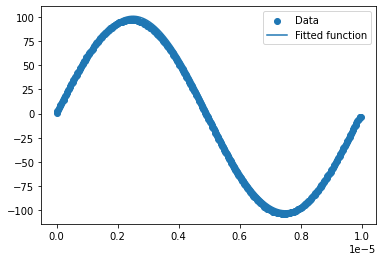

In [3]:
from scipy import optimize

def test_func(time, a, b,f):
    b = 2*np.pi*f
    return a* np.sin(b*time)

params, params_covariance = optimize.curve_fit(test_func, GS100.time[1000:1400], GS100.data[1000:1400],
                                               p0=[100, 628000, 100000])

print(params)

plt.scatter(GS100.time[1000:1400], GS100.data[1000:1400], label='Data')
plt.plot(GS100.time[1000:1400], test_func(GS100.time[1000:1400], params[0], params[1], 100000),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

Text(0.5, 1.0, 'Generator to Oscilloscope, 1 cycle')

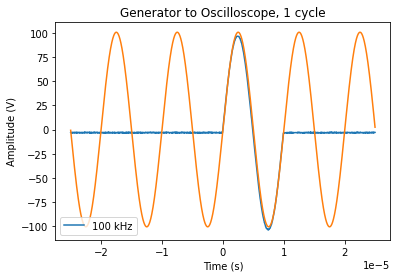

In [4]:
plt.plot(GS100.time, GS100.data, label="100 kHz")
plt.plot(GS100.time,params[0]* np.sin(params[1]*GS100.time))
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude (V)')
plt.title('Generator to Oscilloscope, 1 cycle')

[1.00784432e+02 6.28310000e+06 1.00948737e+06]


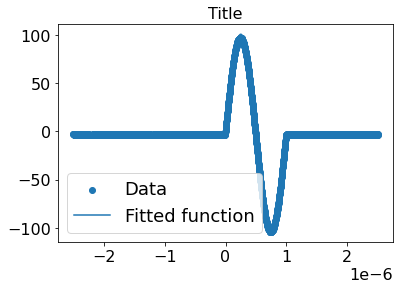

In [13]:
params2, params_covariance2 = optimize.curve_fit(test_func, GS1000.time[1000:1400], GS1000.data[1000:1400],
                                               p0=[100, 6283100, 1000000]) 

# p0: max amplitude (read from plot), b=2pi*f (f is input freq), f (input freq)
print(params2)

plt.scatter(GS1000.time, GS1000.data, label='Data')
plt.plot(GS1000.time[1000:1400], test_func(GS1000.time[1000:1400], params2[0], params2[1], 1000000),
         label='Fitted function')
plt.title("Title")

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)
plt.legend(loc='best')

plt.show()

Text(0.5, 0, 'Frequency (kHz)')

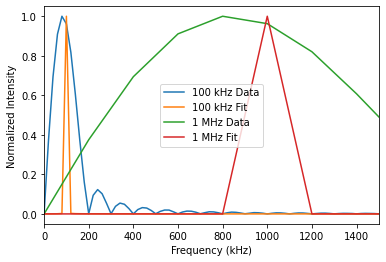

In [102]:
f1,FT1=myfft(GS100.time, GS100.data)
fit = params[0]* np.sin(params[1]*GS100.time)
f2,FT2=myfft(GS100.time, fit )

f3,FT3=myfft(GS1000.time, GS1000.data)
fit2 = params2[0]* np.sin(params2[1]*GS1000.time)
f4,FT4=myfft(GS1000.time, fit2 )

plt.plot(f1,np.abs(FT1)/max(np.abs(FT1)),label='100 kHz Data')
plt.plot(f2,np.abs(FT2)/max(np.abs(FT2)),label='100 kHz Fit')
plt.plot(f3,np.abs(FT3)/max(np.abs(FT3)),label='1 MHz Data')
plt.plot(f4,np.abs(FT4)/max(np.abs(FT4)),label='1 MHz Fit')

plt.xlim([0,1500])
plt.legend()
plt.ylabel('Normalized Intensity')
plt.xlabel('Frequency (kHz)')

Text(0.5, 1.0, 'Generator to Oscilloscope, 1 cycle')

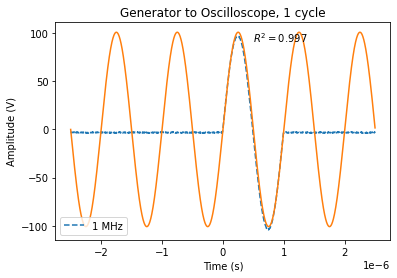

In [103]:
plt.plot(GS1000.time, GS1000.data, "--",label="1 MHz")
plt.plot(GS1000.time,params2[0]* np.sin(params2[1]*GS1000.time))
plt.text(0.5e-6, 90, '$R^2=0.997$', fontsize=10)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude (V)')
plt.title('Generator to Oscilloscope, 1 cycle')

In [104]:
residuals = GS1000.data[1000:1400] - test_func(GS1000.time[1000:1400], *params2)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((GS1000.data[1000:1400]-np.mean(GS1000.data[1000:1400]))**2)

In [105]:
r_squared = 1 - (ss_res / ss_tot)

In [106]:
print(r_squared)

0.9973668724434109


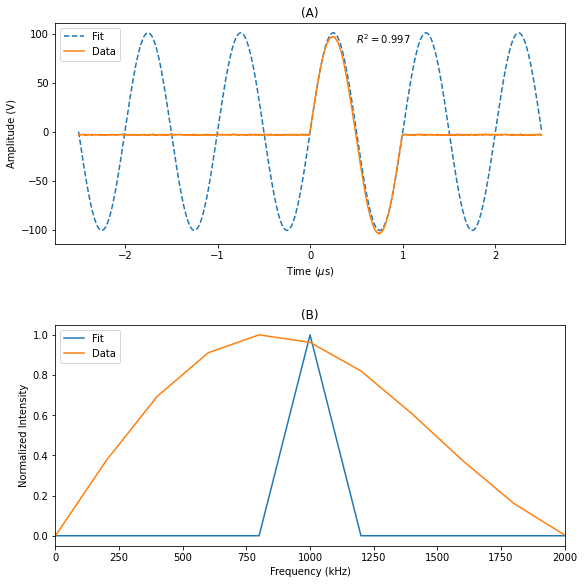

In [107]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# plot time signal:
axs[0].set_title("(A)")
axs[0].plot(GS1000.time*1e6,params2[0]* np.sin(params2[1]*GS1000.time) ,"--",label="Fit")
axs[0].plot(GS1000.time*1e6, GS1000.data,label="Data")
axs[0].set_xlabel("Time ($\mu$s)")
axs[0].set_ylabel("Amplitude (V)")
axs[0].legend(loc=2)
axs[0].text(0.5, 90, '$R^2=0.997$', fontsize=10)
#axs[0].text(1e-6, 90, 'Begin text', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

axs[1].plot(f4,np.abs(FT4)/max(np.abs(FT4)),label='Fit')
axs[1].plot(f3,np.abs(FT3)/max(np.abs(FT3)),label='Data')

axs[1].set_title("(B)")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Normalized Intensity")
axs[1].set_xlim([0, 2000])
axs[1].legend(loc=2)
fig.tight_layout(pad=0.3, w_pad=0.2,h_pad=3)
#fig.tight_layout()
plt.savefig('Figures/bestfit.jpg', dpi=400)

In [108]:
# Frequency spacing, df (Hz):
df_data = (f3[2]-f3[1])
df_Fit = (f4[2]-f4[1])

In [109]:
print(df_data)

200.0


In [110]:
print(df_Fit)

200.0


In [111]:
# Frequency at peak (Hz):
print(f4[np.argmax(np.abs(FT4))]/1000)

-1.0000000000000095


In [112]:
# Frequency at peak (Hz):
print(f3[np.argmax(np.abs(FT3))]/1000)

0.8000000000000077
